# 
- **Answer Set** : NO. 01
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

BPSK and QPSK Modulations in AWGN Channel

## BPSK

In [1]:
N=10;
data1=randi([0,1],N,1);
data2=2*data1 -1;
%% INPUT SINGNAL FOR MODULATOR
p=repmat(ones(1000,1),1,N);
x=data2.*p';
y=data1.*p';
dx=x';
dx=dx(:)';
dy=y';
dy=dy(:)';
%% MODULATOR
T=1;
fc=100;
t=linspace(0,N*T,length(x));
m=sqrt(2/T)*cos(2*pi*fc*t);
x1=x.*m;
dx1=x1';
dx1=dx1(:)';


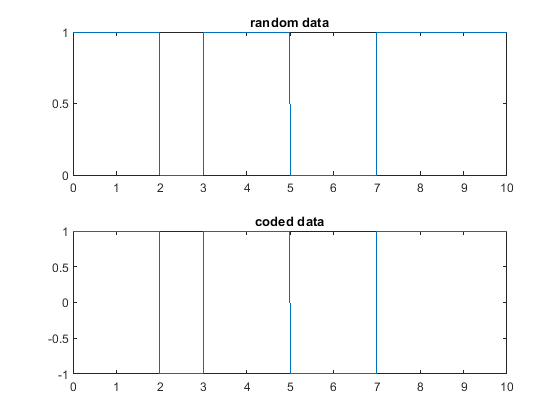

In [2]:
%% PLOT
t1=linspace(0,N*T,length(dx));
figure(1)
subplot(2,1,1)
plot(t1,dy);
title('random data')
subplot(2,1,2)
plot(t1,dx);
title('coded data')

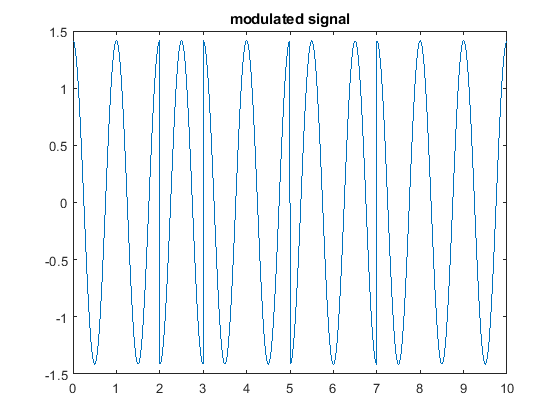

In [3]:
figure(2)
plot(t1,dx1);
title('modulated signal')

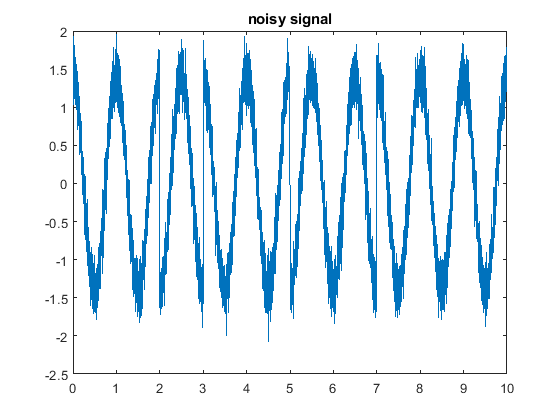

In [4]:
%% DEMODULATOR
m=sqrt(2/T)*cos(2*pi*fc*t);
data3=x1.*m;
for i=1:N
    data4(i,1)=data3(i)/2;
end

%% AWGN CHANEL
x2=awgn(x1,15);
figure(3)
dx2=x2';
dx2=dx2(:)';
plot(t1,dx2)
title('noisy signal')

%% DETECTOR
for i=1:N
if (data4(i)>0)
    data5(i,1)=1;
else
    data5(i,1)=0;
end
end

Detected Data:

In [5]:
data5


data5 =

     1
     1
     0
     1
     1
     0
     0
     1
     1
     1




## QPSK

In [12]:
clear
clc
%% QPSK MODULATION
%% CREATE RANDOM DATA
s0=1+i*0;
s1=0+i*1;
s2=-1+i*0;
s3=0+i*-1;
N=10;
T=1;
fc=3;
for i=1:N
    r=randi([0,3]);
    if(r==0)
        data1(i)=s0;
    end
    if(r==1)
        data1(i)=s1;
    end
    if(r==2)
        data1(i)=s2;
    end
    if(r==3)
        data1(i)=s3;
    end
end
%% ORTHONORMAL SIGNALS
M=4;
t=linspace(0,N*T,1000);
ph0=sqrt(2/T)*cos(2*pi*fc*t);
ph1=sqrt(2/T)*cos(2*pi*fc*t+pi/2);
ph2=sqrt(2/T)*cos(2*pi*fc*t+pi);
ph3=sqrt(2/T)*cos(2*pi*fc*t+3*pi/2);
%% MODULATOR
K=100;
x=zeros(N,K);
for i=1:N
    if (data1(i)==s0)
        for j=1:K;
            x(i,j)=ph0(1,j);
        end    
    end
    if (data1(i)==s1)
        for j=1:K;
            x(i,j)=ph1(1,j);
        end  
    end
    if (data1(i)==s2)
        for j=1:K;
            x(i,j)=ph2(1,j);
        end  
    end
    if (data1(i)==s3)
        for j=1:K;
            x(i,j)=ph3(1,j);
        end  
    end
end
%% NOISY CHANEL
y=awgn(x,10);
%% DEMODULATOR
x=x(:)';
y=y(:)';

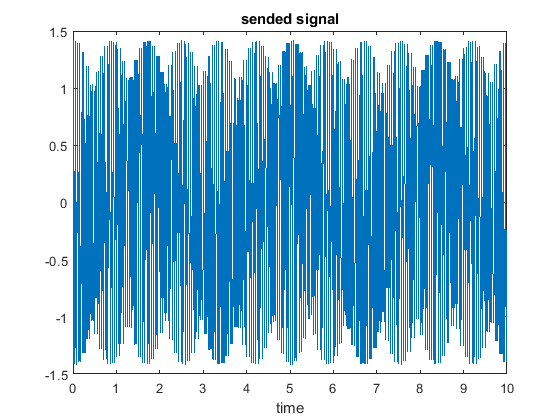

In [13]:
%% PLOT
x=x(:)';
y=y(:)';
t1=linspace(0,N*T,length(x));
figure(1)
plot(t1,x);
title('sended signal');xlabel('time')

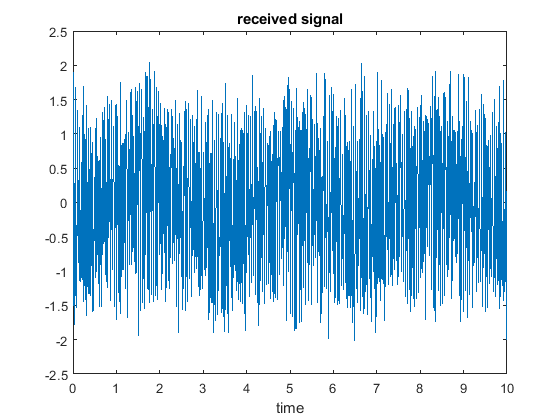

In [14]:
figure(2)
plot(t1,y);
title('received signal');xlabel('time')